In [2]:
library(fda)
library(R.matlab)


In [4]:
f <- readMat('./../resting_data/fmri/fmri_concate_run1.mat')

In [5]:
f_t <- f$ts[,,8:293]
g = array(f_t, dim = c(dim(f_t)[1]*dim(f_t)[2], 286))
obs.time <- seq(15,586,2)

In [6]:
#f.new <- aperm(f$ts, c(2,1,3))
f_t <- f$ts[,,2:299] #remove the start and end, 2second each
g = array(f_t, dim = c(26*68,298))
obs.time <- seq(3,598,2)

In [7]:
length(obs.time)

[1] 298

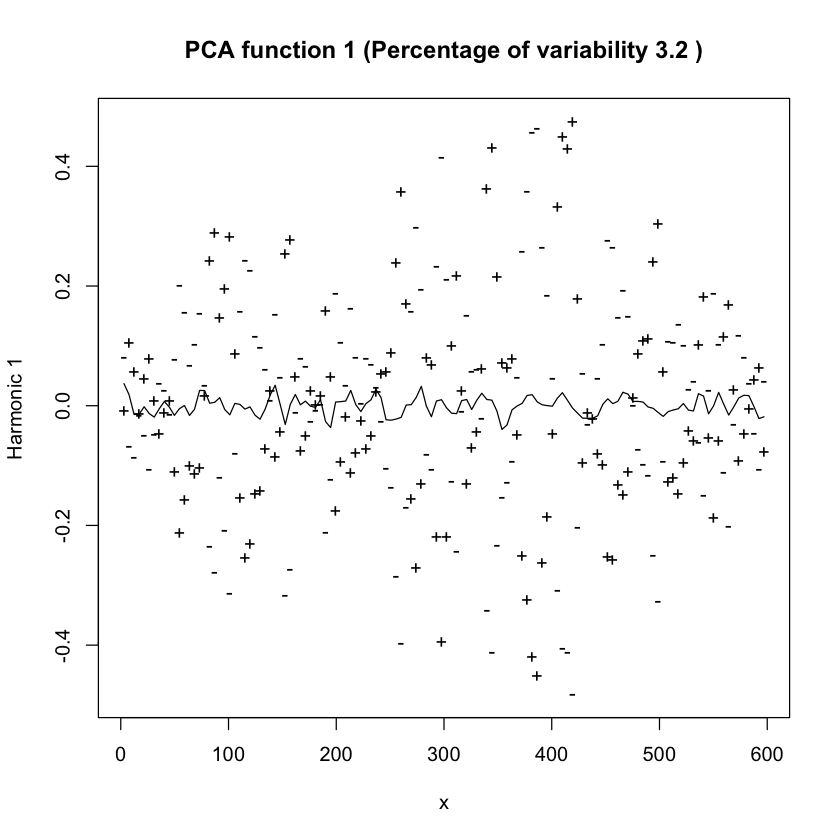

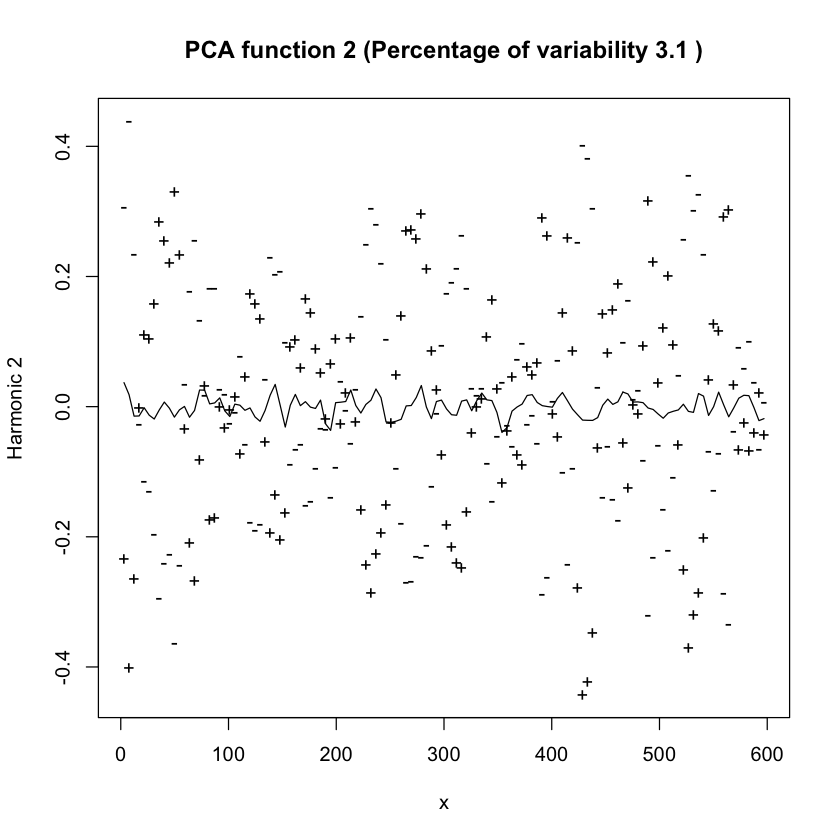

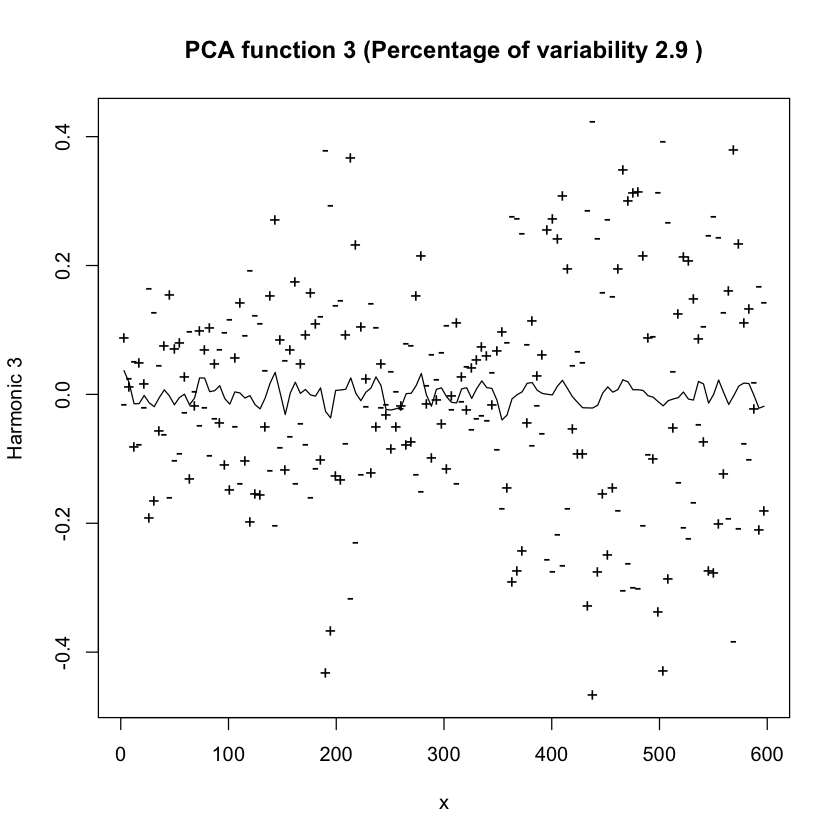

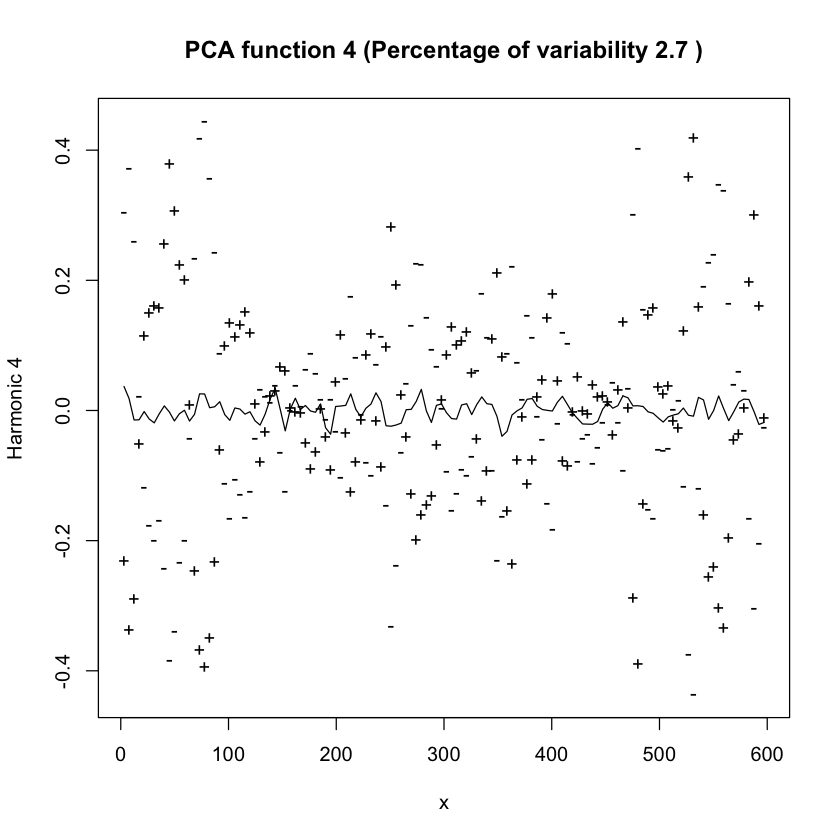

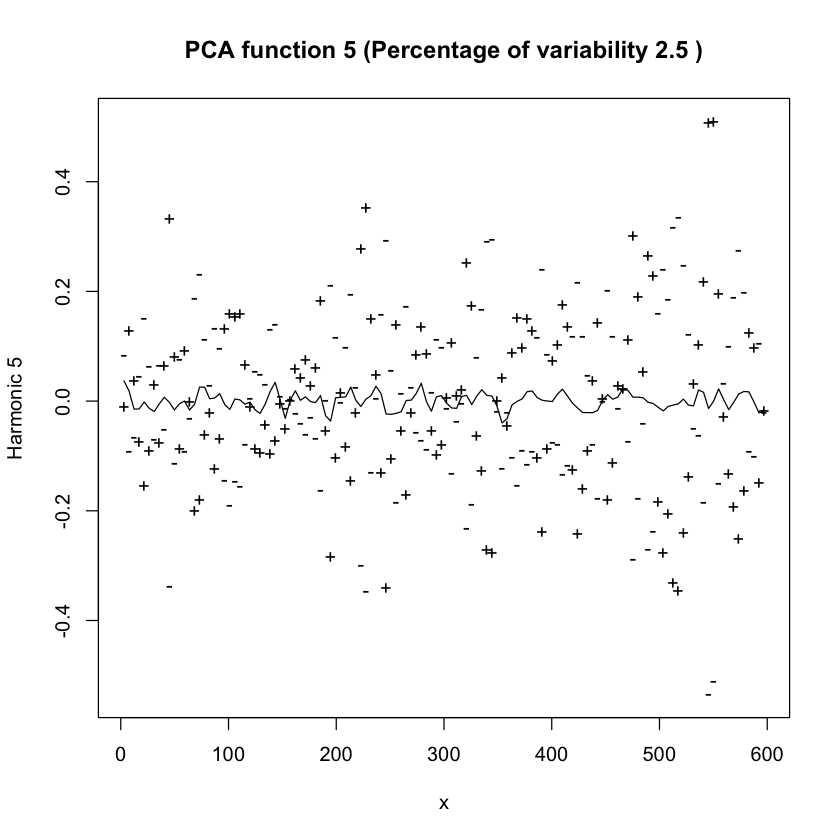

In [8]:
basis <- create.fourier.basis(rangeval=c(3, 598), nbasis=10)
g.fdobj<-Data2fd(argvals=obs.time, t(g))
par(bg="white")
plot.pca.fd(pca.fd(g.fdobj, nharm=5))

In [9]:
sum_list <- list()
for( b in c(5,10,20,30,40,50,60,70,80,90,100,150,200,300,600)){
    basis <- create.fourier.basis(rangeval=c(1, 600), nbasis=b)
    sum.a <- 0
    g.fdobj<-Data2fd(argvals=obs.time,t(g), basis)
    for(i in 1:(dim(g)[1])){
        a <- sum(sqrt((eval.fd(obs.time, g.fdobj[i])- g[i,])**2))/sum(sqrt(g[i,]**2))
        sum.a <- sum.a+a
    }
    sum_list <- append(sum_list,sum.a/(68*26*286))
}




In [356]:
sum_list

[[1]]
[1] 0.003490837

[[2]]
[1] 0.00345515

[[3]]
[1] 0.003088905

[[4]]
[1] 0.002739617

[[5]]
[1] 0.002424363

[[6]]
[1] 0.002105236

[[7]]
[1] 0.001766649

[[8]]
[1] 0.00143148

[[9]]
[1] 0.001033845

[[10]]
[1] 0.0005078743

[[11]]
[1] 5.604271e-06

[[12]]
[1] 3.814306e-09

[[13]]
[1] 8.36483e-07

[[14]]
[1] 1.255126e-05

[[15]]
[1] 2.05666e-05

In [30]:
create.fourier.basis(rangeval=c(3, 598), nbasis=21, dropind=c(1,10))

Warning message in any(diff(dropind)):
“ 'double' 型の引数を論理型に変換します ”


$call
basisfd(type = type, rangeval = rangeval, nbasis = nbasis, params = params, 
    dropind = dropind, quadvals = quadvals, values = values, 
    basisvalues = basisvalues)

$type
[1] "fourier"

$rangeval
[1]   3 598

$nbasis
[1] 21

$params
[1] 595

$dropind
[1]  1 10

$quadvals
NULL

$values
list()

$basisvalues
list()

$names
 [1] "const" "sin1"  "cos1"  "sin2"  "cos2"  "sin3"  "cos3"  "sin4"  "cos4" 
[10] "sin5"  "cos5"  "sin6"  "cos6"  "sin7"  "cos7"  "sin8"  "cos8"  "sin9" 
[19] "cos9"  "sin10" "cos10"

attr(,"class")
[1] "basisfd"

const 
0.8293218

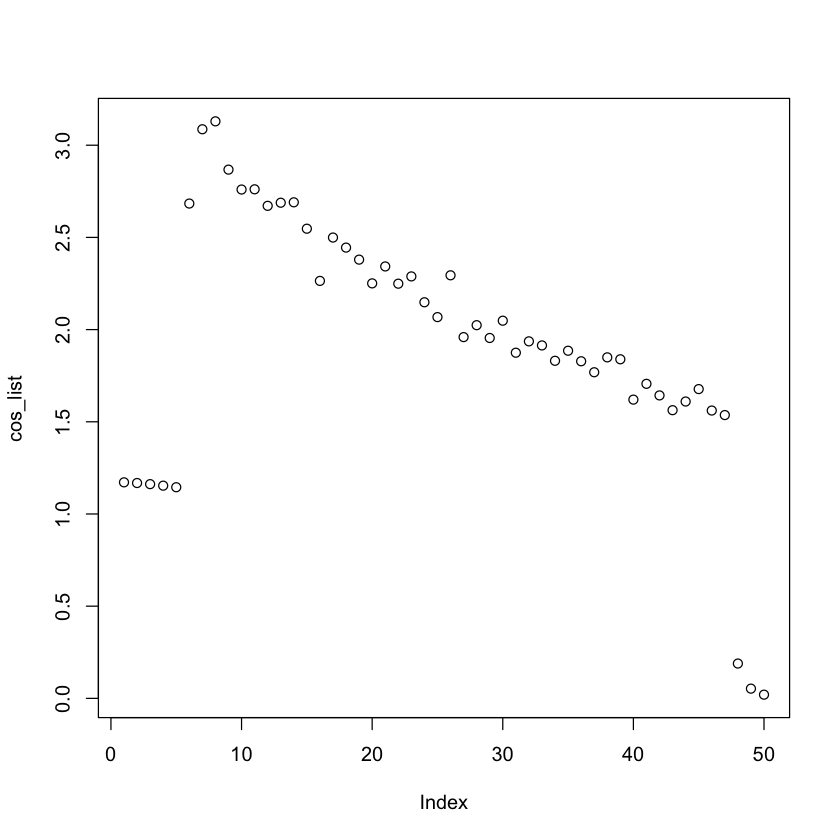

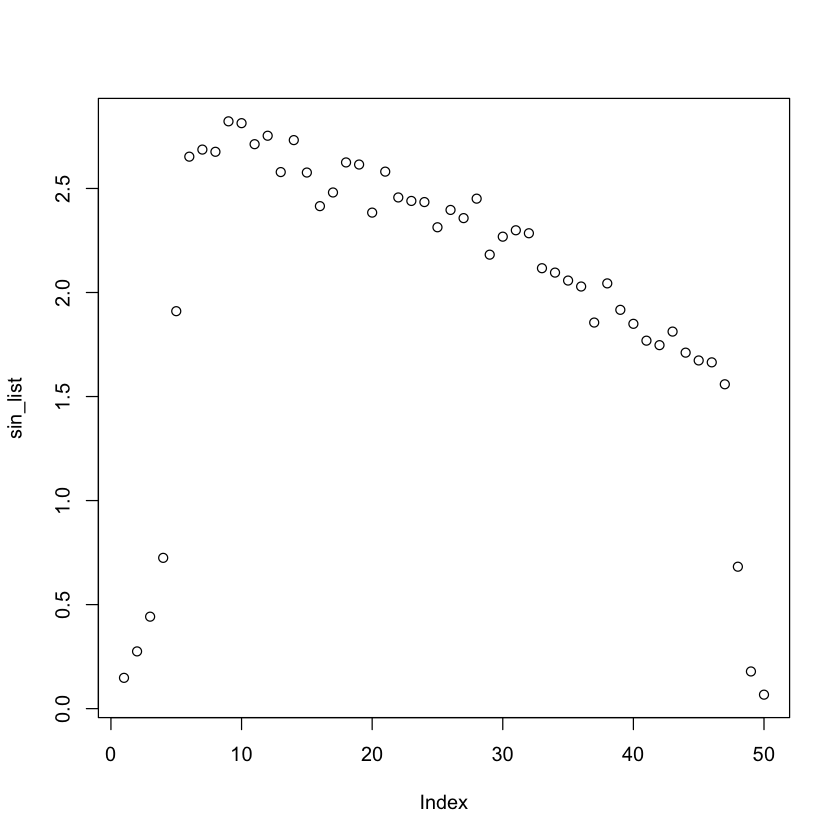

In [357]:

basis <- create.fourier.basis(rangeval=c(1, 600), nbasis=100)

g.fdobj<-Data2fd(argvals=obs.time,t(g), basis)
f_s <- rowMeans(sqrt(g.fdobj$coefs**2))
par(bg="white")
cos_list = matrix(0,50)
sin_list = matrix(0,50)

for( i in 1:50){
    cos_list[i] = f_s[paste('cos', toString(i), sep="")]
    sin_list[i] = f_s[paste('sin', toString(i), sep="")]
}
f_s['const']
par(bg="white")
plot(cos_list)

par(bg="white")
plot(sin_list)

In [360]:
trun_thre = 2.5
idx = intersect(which(cos_list > trun_thre), which(sin_list > trun_thre))

row_idx = 'const'
for(i in idx){
    row_idx <- c(row_idx, paste('sin', i, sep=""), paste('cos', i, sep=""))
}
#select coefficients based idx

select_coef <- matrix(0, length(row_idx), dim(g.fdobj$coefs)[2])
print(length(row_idx))
rownames(select_coef) <- row_idx
m <- 1
for(id in row_idx){
    select_coef[m,] <- g.fdobj$coefs[id,]
    m <- m+1
}


[1] 21


In [13]:
#g[2,] == f$ts[2,1,]
#q[2,1,] == select_coef[,2]
#dim(select_coef)#[,[obj1,obj2,...obj26]x68]
fmri_data <- array(t(select_coef), dim=c(26,68,length(row_idx)), dimnames=list(NULL,NULL,row_idx)) 
#fmri_data[1,2,] == select_coef[,27]


In [42]:
install.packages('wavethresh')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
library(wavethresh)

WaveThresh: R wavelet software, release 4.6.8, installed


Copyright Guy Nason and others 1993-2016


Note: nlevels has been renamed to nlevelsWT




In [15]:
f <- readMat('./../resting_data/eeg/eeg_concate_run1_down70.mat')
print(dim(f$ts))
print(dim(f$delta))
print(dim(f$theta))
print(dim(f$alpha))
print(dim(f$beta))
print(dim(f$gamma))


[1]   26   68 2048
[1]   26   68 2048
[1]   26   68 2048
[1]   26   68 2048
[1]   26   68 2048
[1]   26   68 2048


In [16]:
f_arr <- array(f$ts, dim=c(26*68, 2048))

In [17]:
waveletFamily <- list(c("DaubExPhase",1),
                      c("DaubExPhase",2),
                      c("DaubExPhase",3),
                      c("DaubExPhase",4),
                      c("DaubExPhase",5),
                      c("DaubExPhase",6),
                      c("DaubExPhase",7),
                      c("DaubExPhase",8),
                      c("DaubExPhase",9),
                      c("DaubExPhase",10),
                      c("Coiflets",1),
                      c("Coiflets",2),
                      c("Coiflets",3),
                      c("Coiflets",4),
                      c("Coiflets",5),
                      c("DaubLeAsymm",4),
                      c("DaubLeAsymm",5),
                      c("DaubLeAsymm",6),
                      c("DaubLeAsymm",7),
                      c("DaubLeAsymm",8),
                      c("DaubLeAsymm",9),
                      c("DaubLeAsymm",10),                                                                                                                                    
                      c("Lawton",3),
                      c("LinaMayrand",5.4))
waveletPacket <- list(c("DaubExPhase",10),
                      c("DaubLeAsymm",10))
levels <- 1:10                    

In [18]:
#baseSelect <- data.frame(WaveletFam = character(),Entropy=numeric(),stringsAsFactors = FALSE)
#for(i in waveletFamily){
#  coefs <- list()
#  for(j in 1:dim(f_arr)[1]){
#    waveletDecomp = wd(family = i[1],data = f_arr[j,], filter.number = i[2])
#    nthresh = 10
#    for (k in 0:nthresh) {
#      coefs <- list(list(accessD(waveletDecomp, level = k)),coefs)
#    }
#    coefs <- list(list(accessC(waveletDecomp, level = 0)),coefs)
#  }
#  coefs <- unlist(coefs)
#  EntropyB <- Shannon.entropy(abs(coefs)/max(abs(coefs)))/(26*68)
#  baseSelect<-rbind(baseSelect,data.frame(waveletFam = paste(i[1],i[2]),Entropy = EntropyB,stringsAsFactors = FALSE))
#}


baseSelect <- data.frame(WaveletFam = character(),Entropy=numeric(),stringsAsFactors = FALSE)
for(i in waveletFamily){
  coefs <- array(0, dim=2048)
  for(j in 1:dim(f_arr)[1]){
    waveletDecomp = wd(family = i[1],data = f_arr[j,], filter.number = i[2])
    nthresh = waveletDecomp$nlevel-1
    s_id = 1

    for (k in 0:nthresh) {
        coefd <- abs(accessD(waveletDecomp, level = k))
        end_id = length(coefd) + s_id
        coefs[s_id:(end_id-1)] <- coefs[s_id:(end_id-1)] + coefd
        #coefs <- list(list(sqrt(accessD(waveletDecomp, level = k)**2)),coefs)
        s_id <- end_id
    }
    coefc <- abs(accessC(waveletDecomp, level = 0))
    end_id <- length(coefc) + s_id
    coefs[s_id:(end_id-1)] <- coefs[s_id:(end_id-1)] + coefc
  }
  coefs <- coefs/(26*68) #take average of the coefficient
  print(length(coefs))
  EntropyB <- Shannon.entropy(abs(coefs)/max(abs(coefs)))/2048
  baseSelect<-rbind(baseSelect,data.frame(waveletFam = paste(i[1],i[2]),Entropy = EntropyB,stringsAsFactors = FALSE))
}

[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048
[1] 2048


In [380]:
strsplit(min(baseSelect[,1]), " ")[[1]][1]
as.integer(strsplit(min(baseSelect[,1]), " ")[[1]][2])

[1] "Coiflets"

[1] 1

In [318]:
#select threshold
coefs <- list()

for(j in 1:dim(f_arr)[1]){
    waveletDecomp = wd(family = 'Coiflets',data = f_arr[j,], filter.number = 1)
    nthresh = waveletDecomp$nlevel-1
    s_id = 1
    for (k in 0:nthresh) {
        coefd <- sqrt(accessD(waveletDecomp, level = k)**2)
        if(j == 1){
            coefs[[k+1]] <-  coefd/(26*68)
        } else {
            coefs[[k+1]] <- coefs[[k+1]] + coefd/(26*68)
        }

        #coefs <- list(list(sqrt(accessD(waveletDecomp, level = k)**2)),coefs)
        s_id <- end_id
    }
    coefc <- sqrt(accessC(waveletDecomp, level = 0)**2)
    if(j == 1){
        coefs[[12]] <- coefc/(26*68)
    } else {
        coefs[[12]] <- coefs[[12]] + coefc/(26*68)
    }
}


[1] 2049


[1] 13

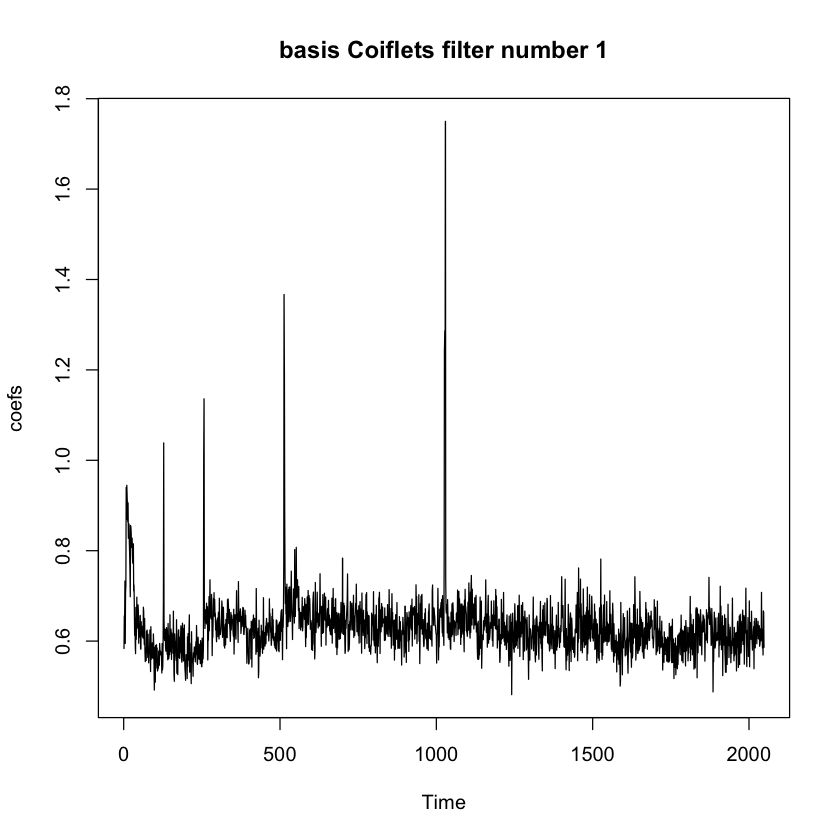

In [330]:
coefs <- array(0, dim=2048)
for(j in 1:dim(f_arr)[1]){
    waveletDecomp = wd(family = 'Coiflets',data = f_arr[j,], filter.number = 1)
    nthresh = waveletDecomp$nlevel-1
    s_id = 1
    for (k in 0:nthresh) {
        coefd <- sqrt(accessD(waveletDecomp, level = k)**2)
        end_id = length(coefd) + s_id
        coefs[s_id:(end_id-1)] <- coefs[s_id:(end_id-1)] + coefd
        #coefs <- list(list(sqrt(accessD(waveletDecomp, level = k)**2)),coefs)
        s_id <- end_id
        
    }
    coefc <- sqrt(accessC(waveletDecomp, level = 0)**2)
    end_id <- length(coefc) + s_id
    coefs[s_id:(end_id-1)] <- coefs[s_id:(end_id-1)] + coefc
}
print(end_id)
coefs <- coefs/(26*68)
par(bg="white")
plot.ts(coefs, main=paste("basis",'Coiflets',"filter number", 1))
length(which(coefs>0.9))

In [350]:
idx = which(coefs>0.9)
length(idx)
#extract score 
score_arr = array(0, dim = c(dim(f_arr)[1], length(idx)))
dim(score_arr)
for(j in 1:dim(f_arr)[1]){
    coef <- array(0, dim=2048)
    waveletDecomp = wd(family = 'Coiflets',data = f_arr[j,], filter.number = 1)
    nthresh = waveletDecomp$nlevel-1
    s_id = 1
    for (k in 0:nthresh) {
        coefd <- sqrt(accessD(waveletDecomp, level = k)**2)
        end_id = length(coefd) + s_id
        coef[s_id:(end_id-1)] <-  coefd
        #coefs <- list(list(sqrt(accessD(waveletDecomp, level = k)**2)),coefs)
        s_id <- end_id
        
    }
    coefc <- sqrt(accessC(waveletDecomp, level = 0)**2)
    end_id <- length(coefc) + s_id
    coef[s_id:(end_id-1)] <-  coefc
    score_arr[j,] <- coef[idx]
}

[1] 13

[1] 1768   13

In [342]:
print(which(coefs>0.9))

 [1]    8   10   11   14  128  256  257  513  514 1026 1027 1028 1029


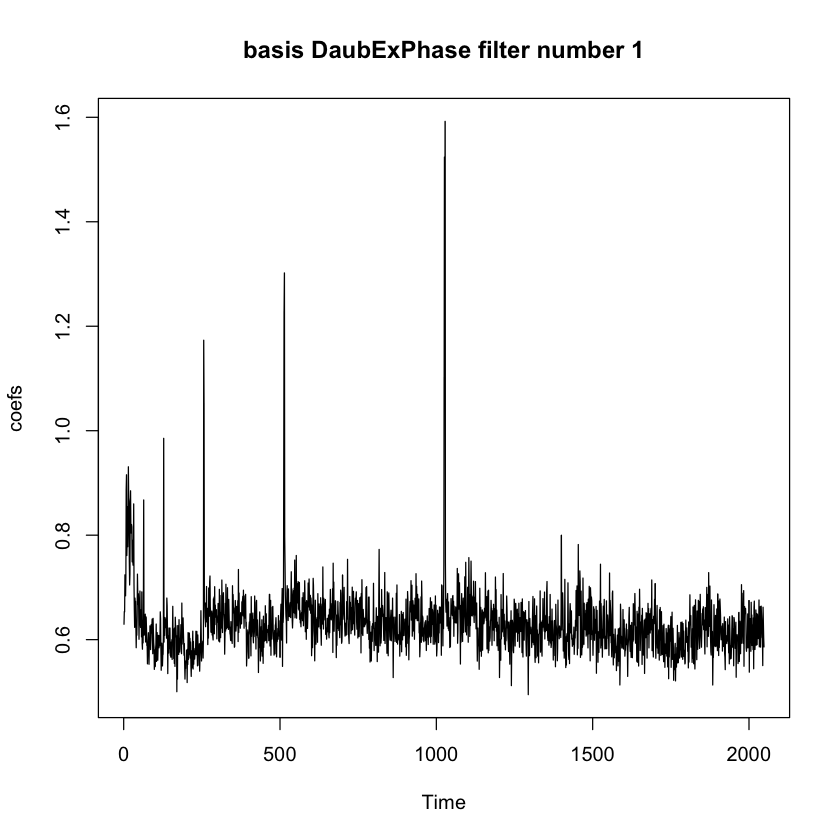

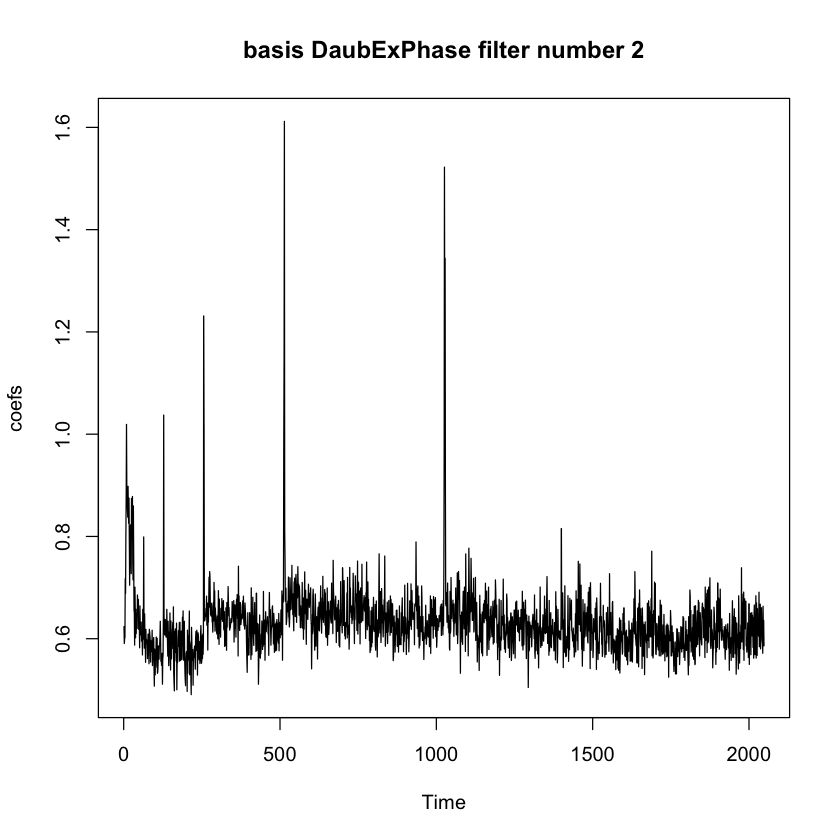

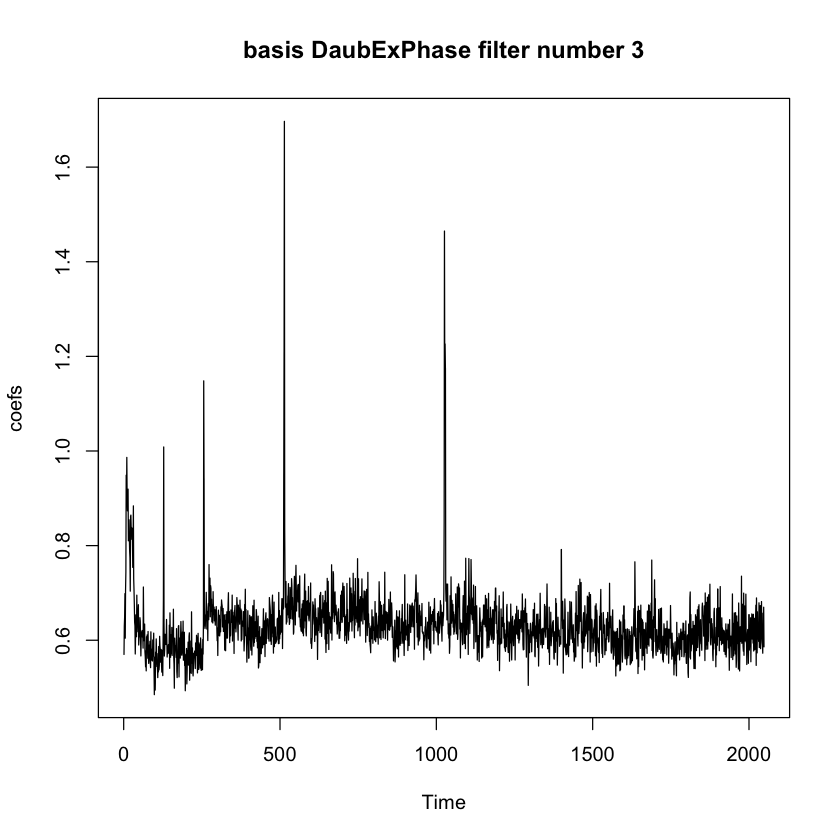

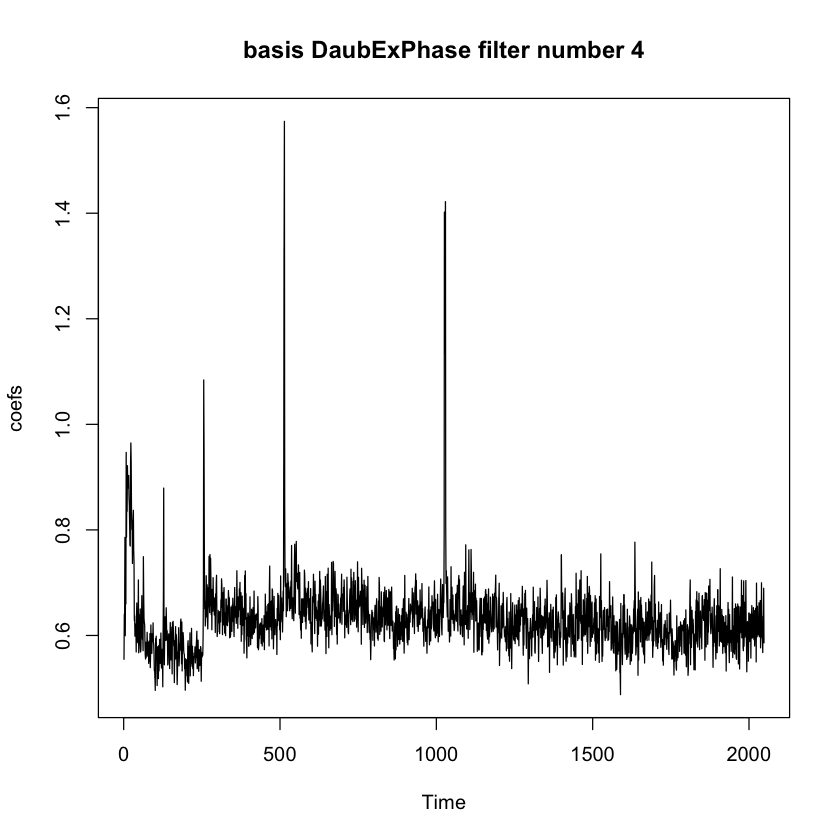

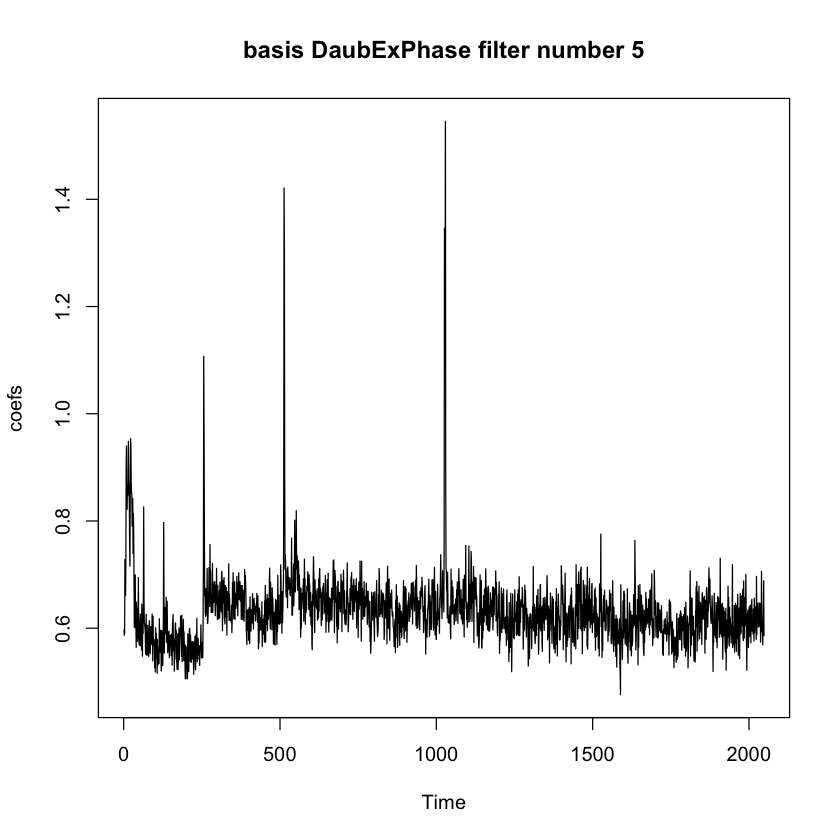

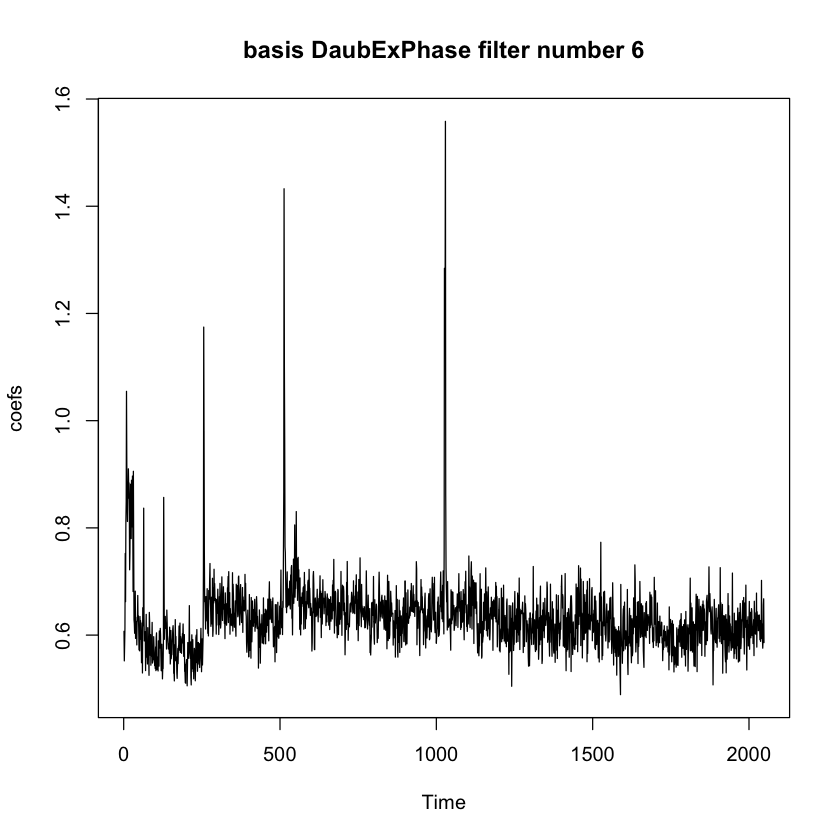

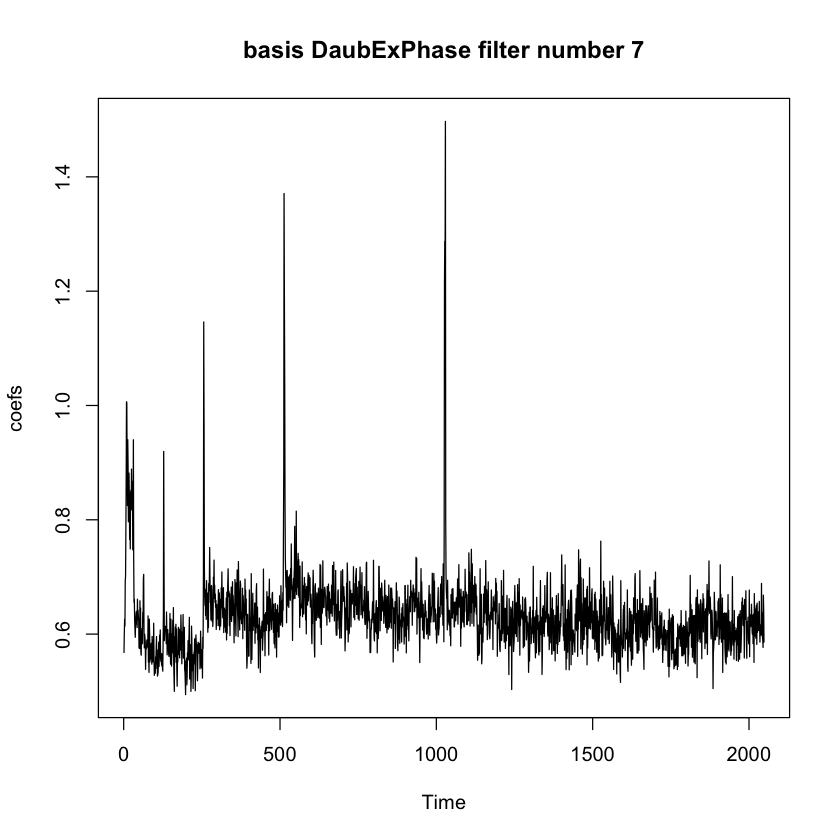

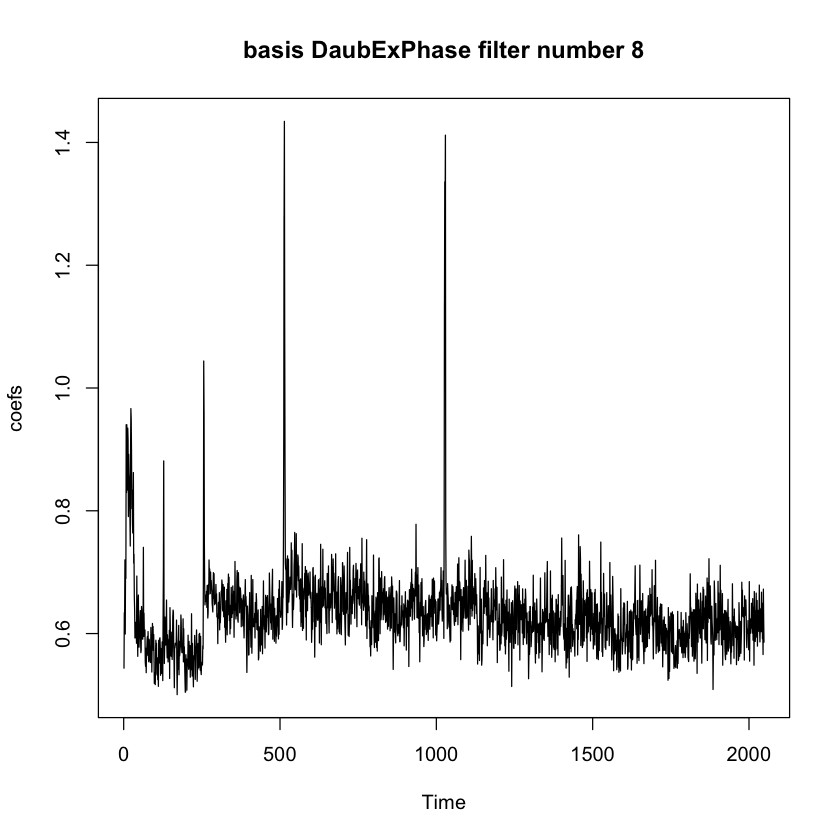

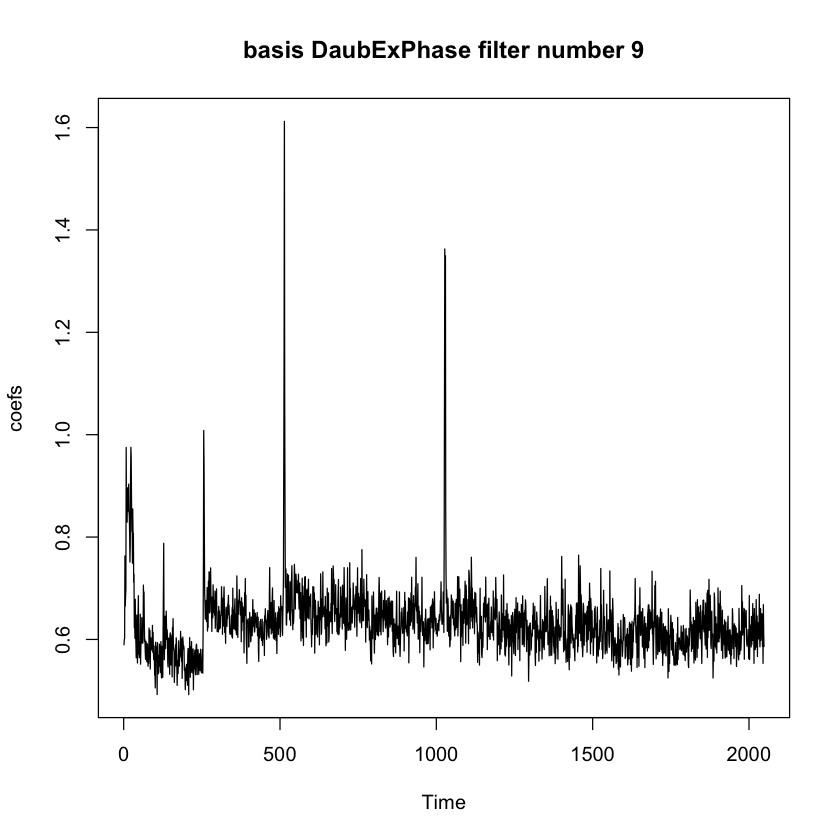

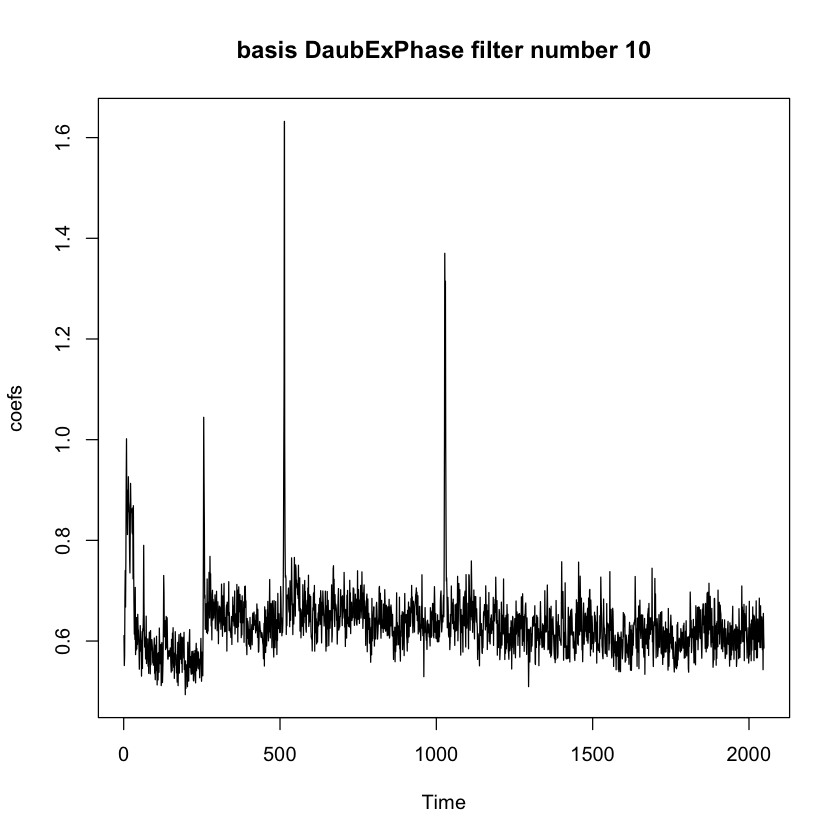

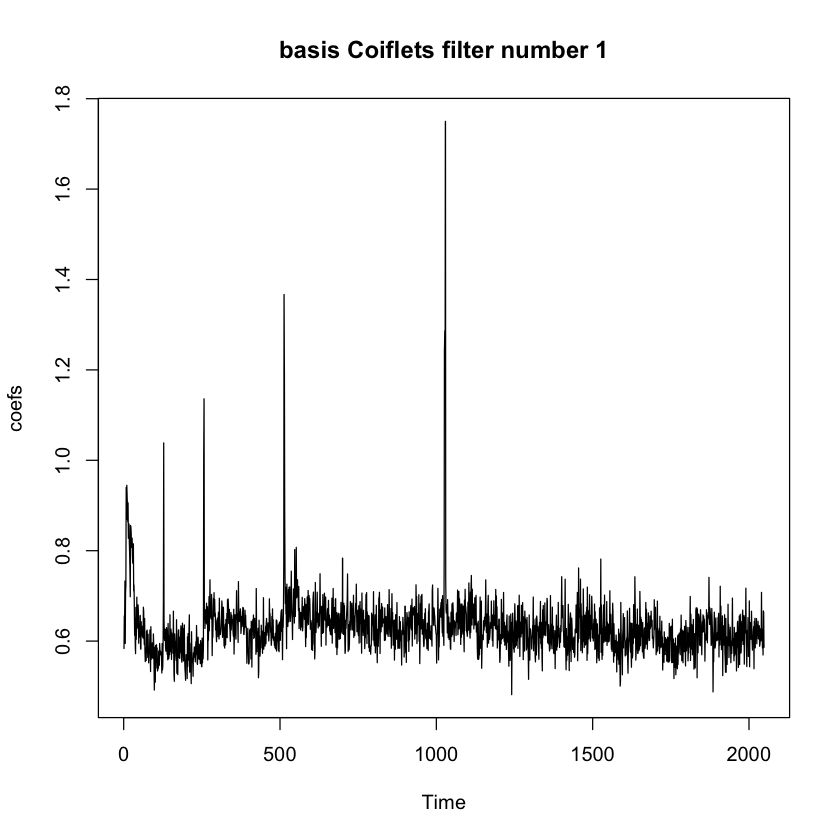

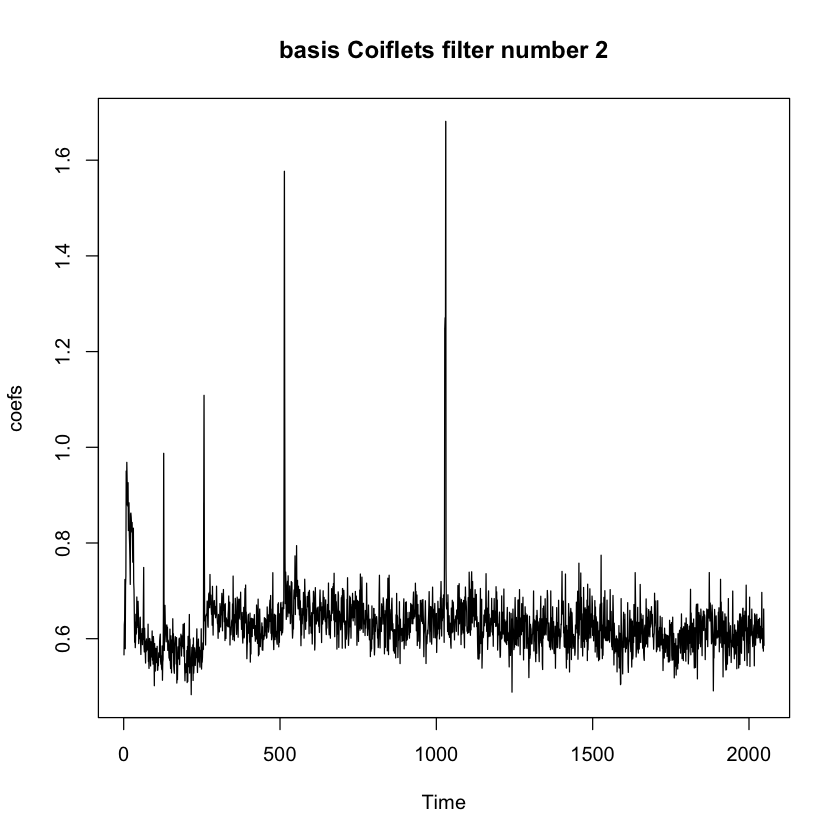

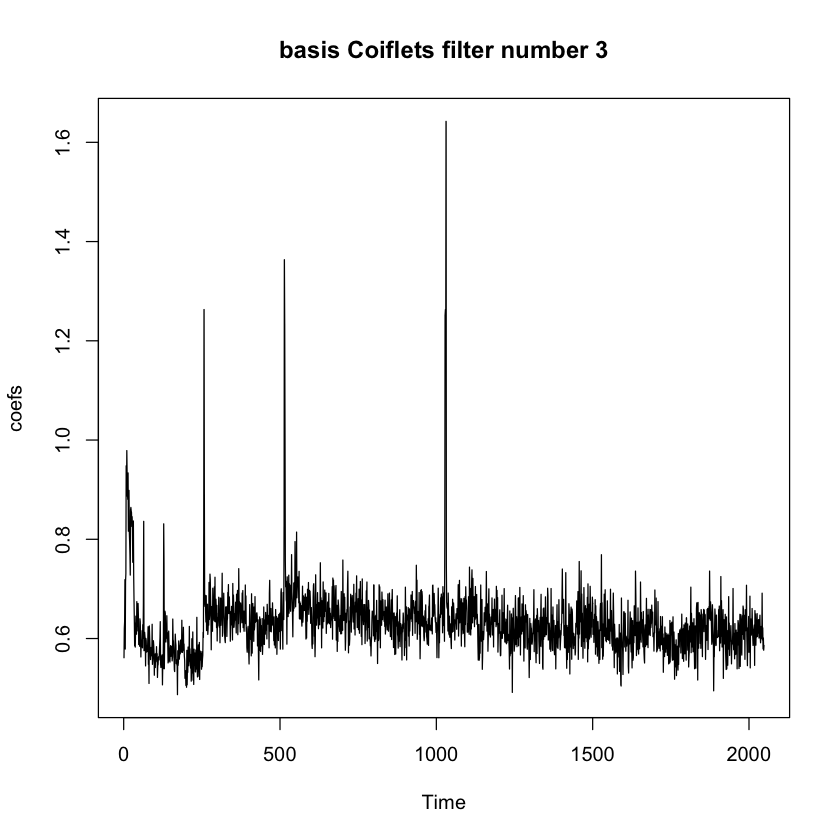

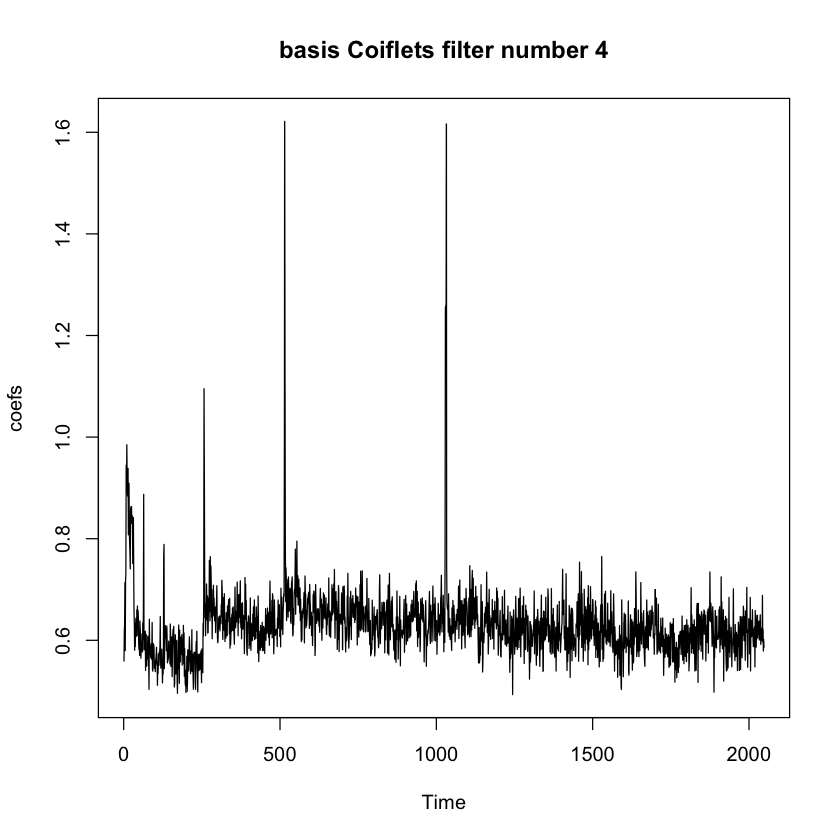

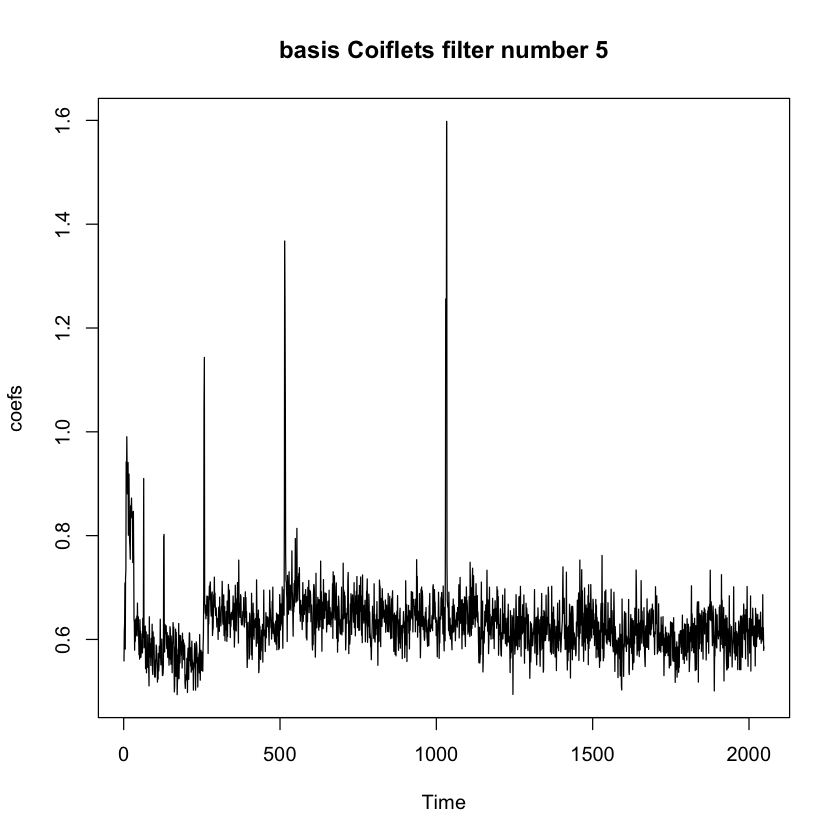

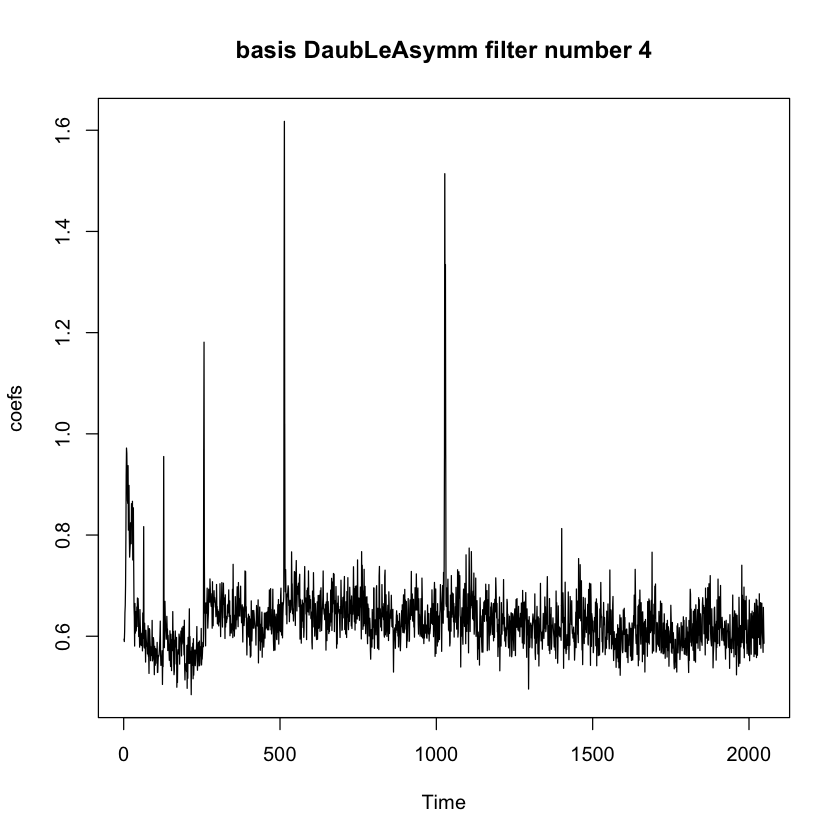

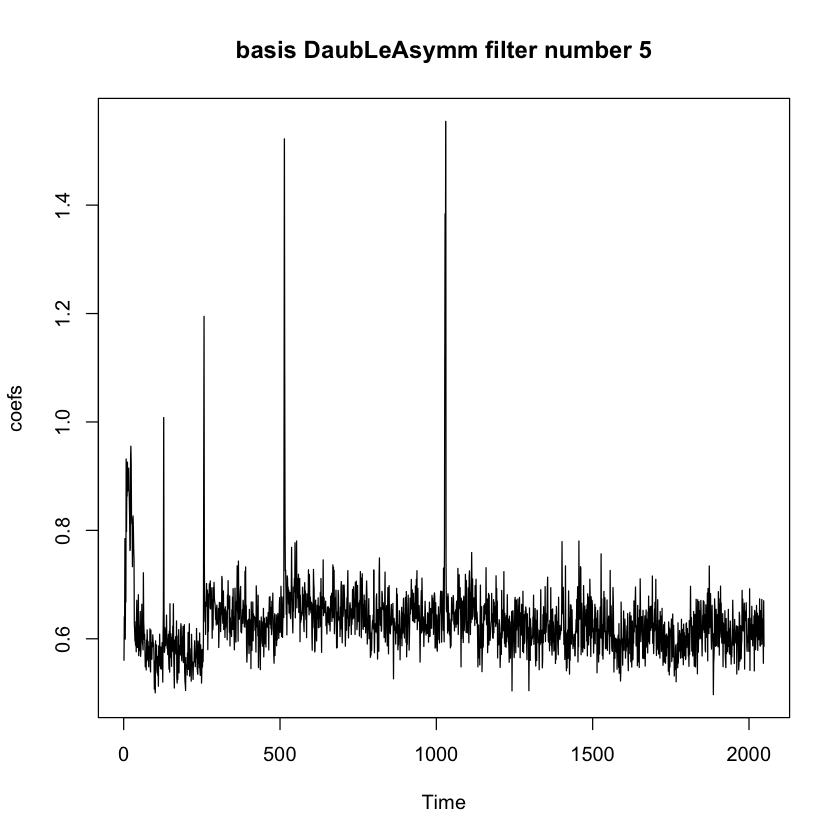

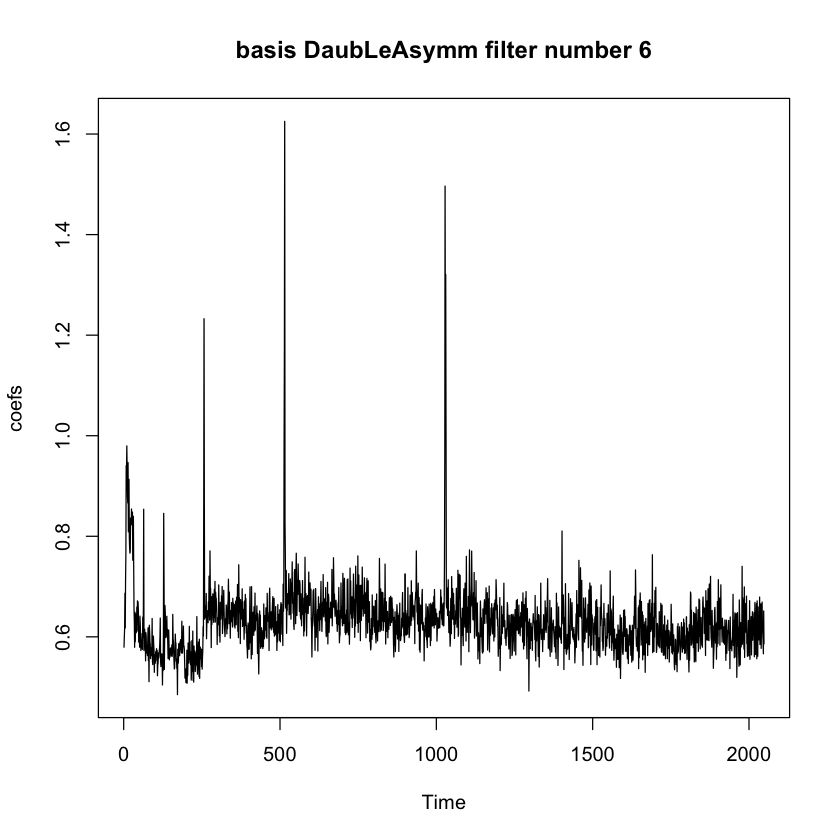

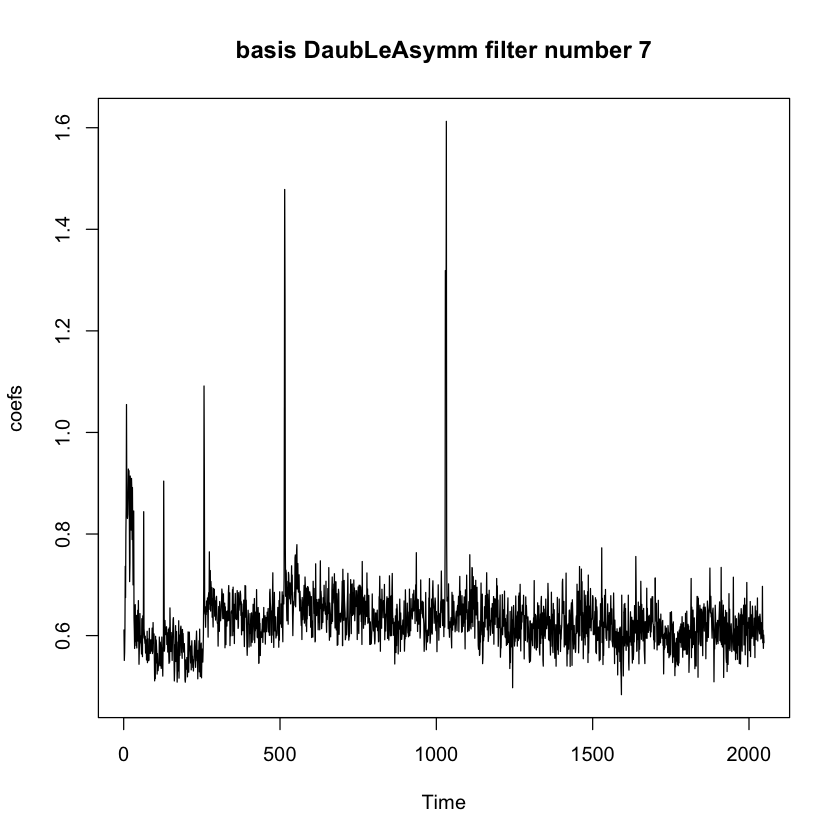

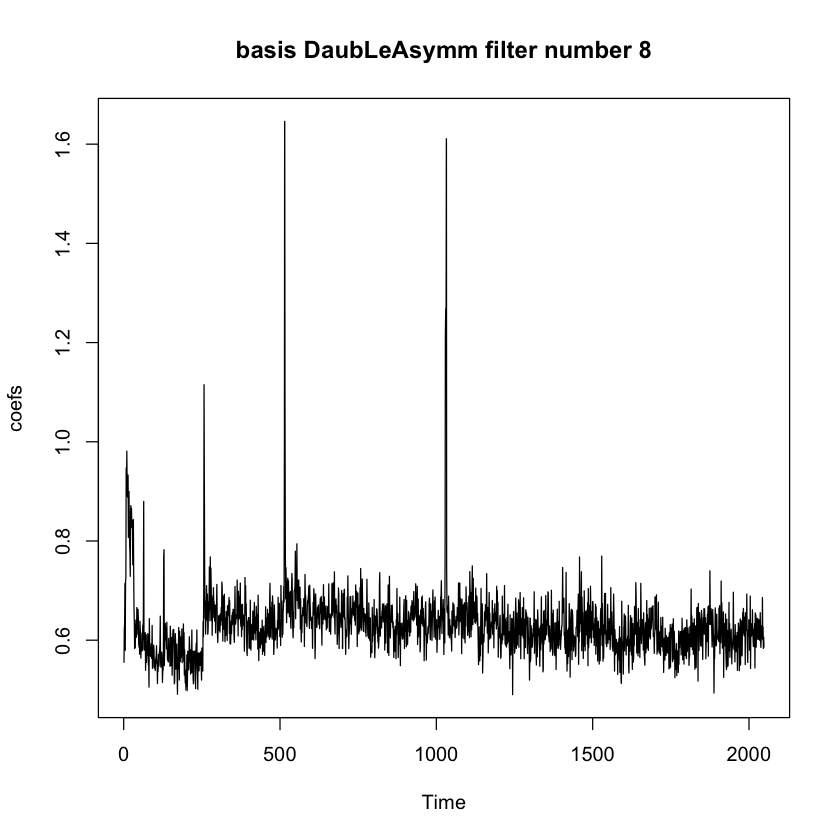

Warning message in xy.coords(x, NULL, log = log, setLab = FALSE):
“ 複素数の虚部は、コネクションで捨てられました ”


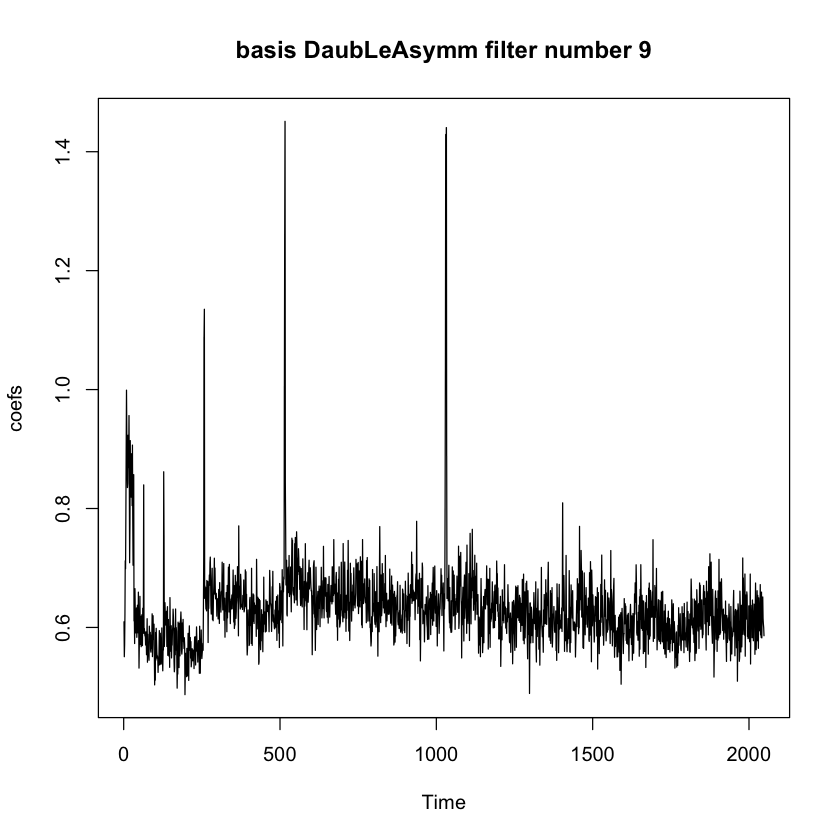

Warning message in xy.coords(x, y):
“ 複素数の虚部は、コネクションで捨てられました ”
Warning message in xy.coords(x, NULL, log = log, setLab = FALSE):
“ 複素数の虚部は、コネクションで捨てられました ”


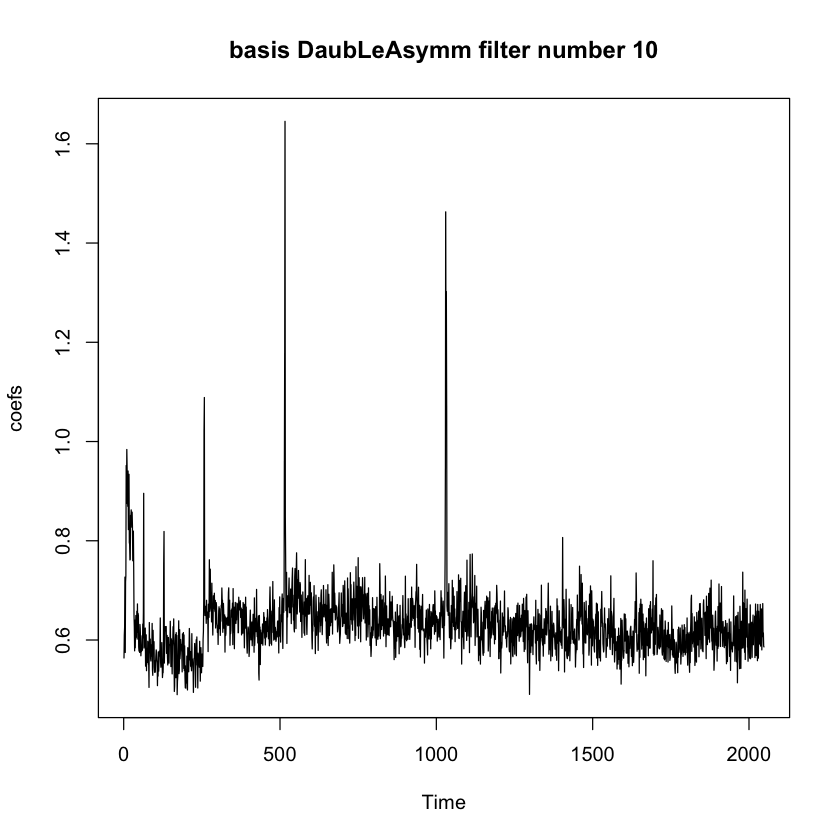

Warning message in xy.coords(x, y):
“ 複素数の虚部は、コネクションで捨てられました ”


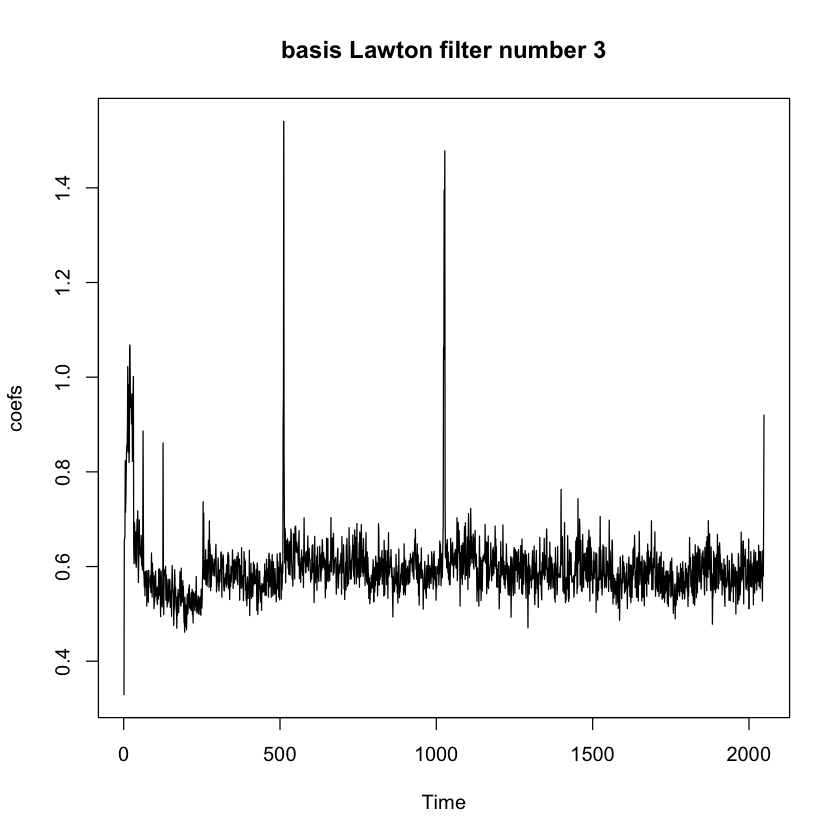

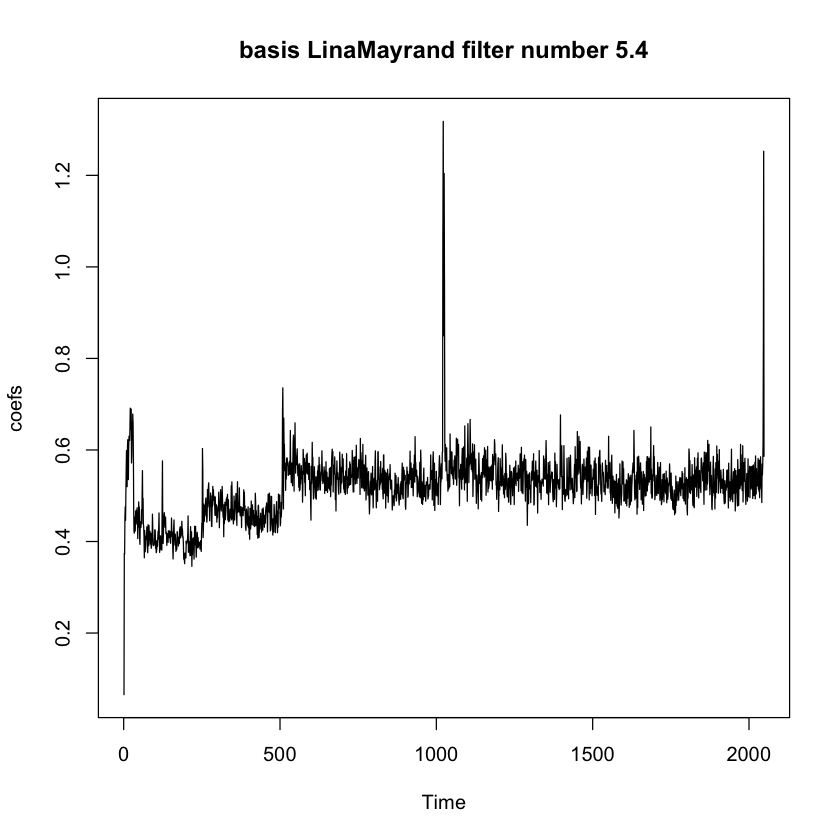

In [220]:
  for(i in waveletFamily){
  coefs <- array(0, dim=2048)
  for(j in 1:dim(f_arr)[1]){
    waveletDecomp = wd(family = i[1],data = f_arr[j,], filter.number = i[2])
    nthresh = 10
    s_id = 1
    for (k in 0:nthresh) {
      coefd <- sqrt(accessD(waveletDecomp, level = k)**2)
      end_id = length(coefd) + s_id
      coefs[s_id:(end_id-1)] <- coefs[s_id:(end_id-1)] + coefd
      #coefs <- list(list(sqrt(accessD(waveletDecomp, level = k)**2)),coefs)
      s_id <- end_id
    }
    coefc <- sqrt(accessC(waveletDecomp, level = 0)**2)
    end_id <- length(coefc) + s_id
    coefs[s_id:(end_id-1)] <- coefs[s_id:(end_id-1)] + coefc
  }
  coefs <- coefs/(26*68)
  par(bg="white")
  plot.ts(coefs, main=paste("basis",i[1],"filter number", i[]))
  }

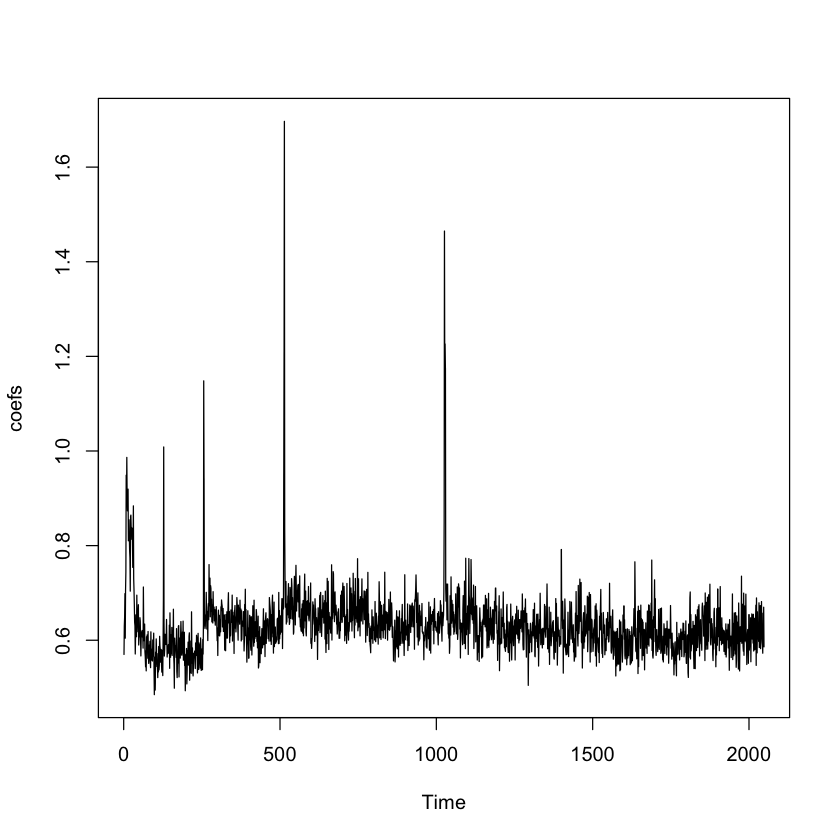

In [203]:
list(list(sqrt(accessD(waveletDecomp, level = k)**2)), coefs)

In [97]:
baseSelect

waveletFam,Entropy
<chr>,<dbl>
DaubExPhase 1,3.168578
DaubExPhase 2,3.565575
DaubExPhase 3,2.880385
DaubExPhase 4,3.524854
DaubExPhase 5,3.283999
DaubExPhase 6,2.893483
DaubExPhase 7,3.009067
DaubExPhase 8,3.552248
DaubExPhase 9,3.210729


[1] 2.773652 2.773652 2.773652 2.773652 2.773652 2.773652 2.773652 2.773652
 [9] 2.773652 2.773652 2.773652

Level:  3  there are  5  zeroes
Level:  4  there are  13  zeroes
Level:  5  there are  27  zeroes
Level:  6  there are  60  zeroes
Level:  7  there are  114  zeroes
Level:  8  there are  222  zeroes
Level:  9  there are  450  zeroes
Level:  10  there are  877  zeroes
there are in total 1768  zeroes


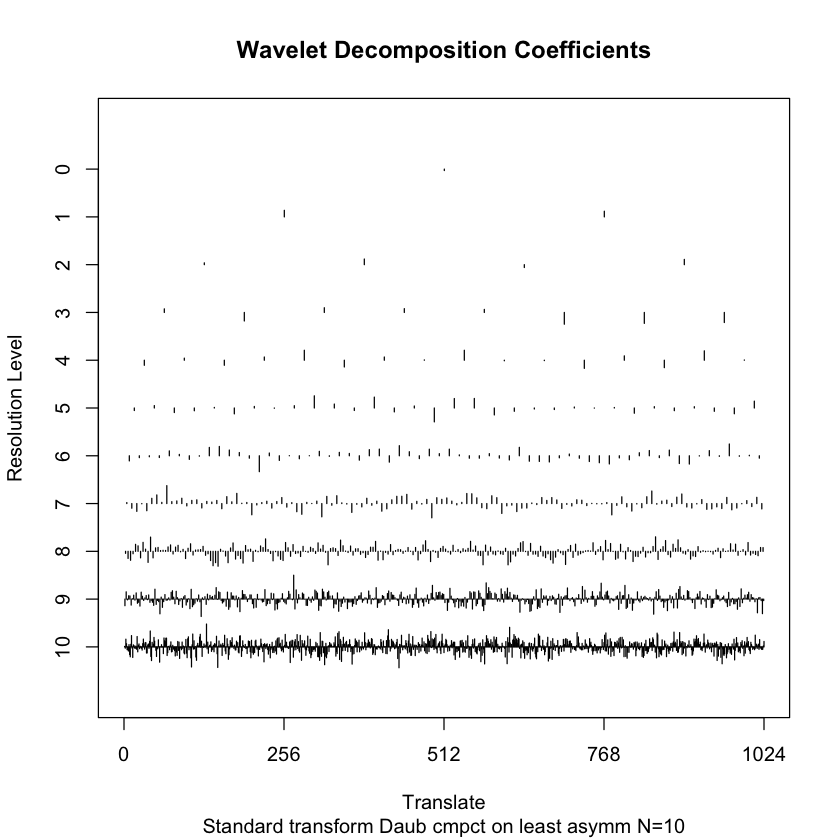

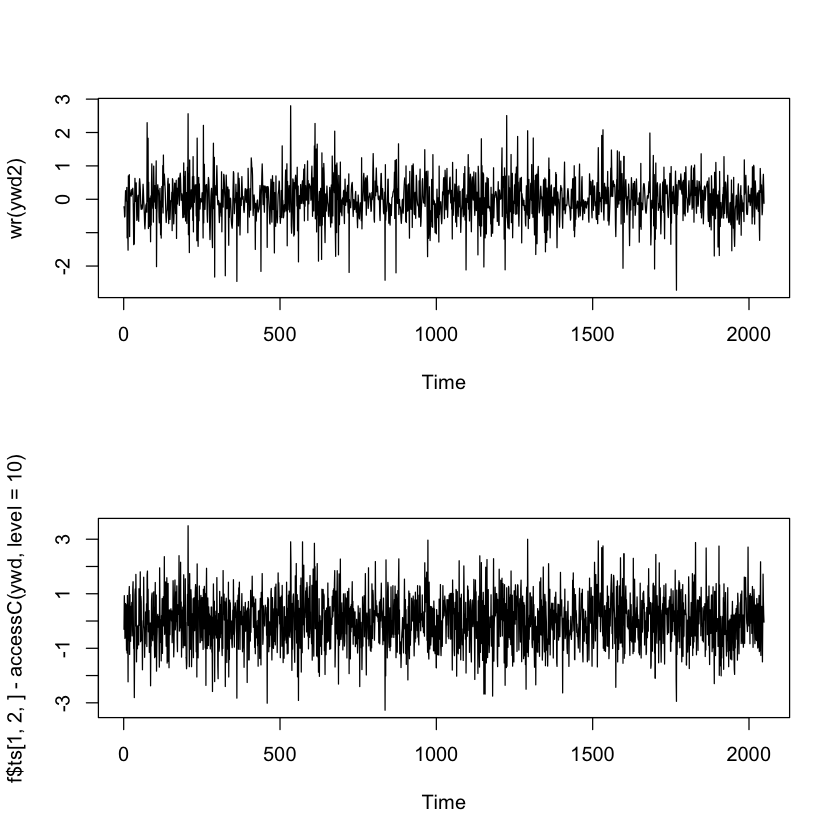

In [176]:
par(bg="white")
ywd <- wd(f$ts[1,2,])
plot(ywd)
levels <- 3:(ywd$nlevels - 1)
nthresh <- length(levels)
d <- NULL
dz <- 0
for (i in 1:nthresh) {
    d <- accessD(ywd, level = levels[i])
    d[abs(d) <= 1.0] = 0
    dz = dz + sum(d == 0)
    cat("Level: ", levels[i], " there are ", sum(d == 0), " zeroes\n")
    ywd2 <- putD(ywd, level = levels[i], v = d)
}
cat("there are in total", dz, " zeroes\n")

par(mfrow = c(2, 1))
ts.plot(wr(ywd2))
ts.plot(f$ts[1,2,] - accessC(ywd, level=10))

In [13]:
#remove the first and last 2 seconds
f_t <- f$ts[,,11:2990]


[1]   26   68 3000

[1]   26   68 2980

In [16]:
prime_factors <- function(x, i=2, factors = NULL){
      if(x<i) factors
      else if(! x %% i) prime_factors(x/i, i, c(factors, i))
      else  prime_factors(x, i+1, factors)
}

In [19]:
prime_factors(150000-1000)

[1]   2   2   2   5   5   5 149

In [38]:
(150000-(150000-2048*72)/2-1-1272+1)/72


[1] 2048

In [ ]:
sampling.rate <- 150000/600
sampling.int <- 600/150000
##remove 2 seconds at both ends
f_t <- f$ts[,,(sampling.rate*2+1):(150000-sampling.rate*2)]



In [ ]:
idx <- seq(1,149000,50)
print(dim(f_t))
print(length(idx))
down_fc <- f_t[,,idx]
eeg <- array(down_fc, dim=c(26*68, length(idx)))

[1]     26     68 149000
[1] 2980


In [ ]:
#Morlet wavelet, commonly used in eeg analysis,  is not orthogonal wavelet


In [125]:
a = list('ts','delta')
for(i in names(f)){
    print(i)
    print(dim(f[[i]]))
}

[1] "ts"
[1]   26   68 2048
[1] "delta"
[1]   26   68 2048
[1] "theta"
[1]   26   68 2048
[1] "alpha"
[1]   26   68 2048
[1] "beta"
[1]   26   68 2048
[1] "gamma"
[1]   26   68 2048
[1] "N"
[1] 1 1
[1] "p"
[1] 1 1
[1] "t"
[1] 1 1


In [112]:
list(f$ts,f$delta)

In [126]:


sum_list <- list()
obs.time <- seq(14, 587, 573/(2048-1))
bdset = c('ts', 'delta', 'theta', 'alpha', 'beta', 'gamma')
for(band in bdset){
    eeg <- array(f[[band]], dim=c(26*68,2048))
    for( b in c(100,150,200,300,600,1000,2000)){
        basis <- create.fourier.basis(rangeval=c(3, 587), nbasis=b)
        sum.a <- 0
        g.fdobj<-Data2fd(argvals=obs.time,t(eeg), basis)
        for(i in 1:(dim(eeg)[1])){
            a <- sum(sqrt((eval.fd(obs.time, g.fdobj[i])- eeg[i,])**2))/sum(sqrt(eeg[i,]**2))
            sum.a <- sum.a+a
        }
        sum_list <- append(sum_list,sum.a/(68*26))
    }
    print(paste("band:", band))
    print(sum_list)
}


[1] "band: ts"
[[1]]
[1] 0.9723412

[[2]]
[1] 0.9626765

[[3]]
[1] 0.9530217

[[4]]
[1] 0.9323146

[[5]]
[1] 0.8462382

[[6]]
[1] 0.7135069

[[7]]
[1] 0.1890041

[1] "band: delta"
[[1]]
[1] 0.9723412

[[2]]
[1] 0.9626765

[[3]]
[1] 0.9530217

[[4]]
[1] 0.9323146

[[5]]
[1] 0.8462382

[[6]]
[1] 0.7135069

[[7]]
[1] 0.1890041

[[8]]
[1] 0.9783682

[[9]]
[1] 0.9670855

[[10]]
[1] 0.955927

[[11]]
[1] 0.9327897

[[12]]
[1] 0.8687492

[[13]]
[1] 0.7948548

[[14]]
[1] 0.2058519

[1] "band: theta"
[[1]]
[1] 0.9723412

[[2]]
[1] 0.9626765

[[3]]
[1] 0.9530217

[[4]]
[1] 0.9323146

[[5]]
[1] 0.8462382

[[6]]
[1] 0.7135069

[[7]]
[1] 0.1890041

[[8]]
[1] 0.9783682

[[9]]
[1] 0.9670855

[[10]]
[1] 0.955927

[[11]]
[1] 0.9327897

[[12]]
[1] 0.8687492

[[13]]
[1] 0.7948548

[[14]]
[1] 0.2058519

[[15]]
[1] 0.9933725

[[16]]
[1] 0.9893057

[[17]]
[1] 0.9854043

[[18]]
[1] 0.9752147

[[19]]
[1] 0.9211502

[[20]]
[1] 0.7923238

[[21]]
[1] 0.2173023

[1] "band: alpha"
[[1]]
[1] 0.9723412

[[2]]
[1] 0.9

In [106]:
dim(f$'ts')

[1]   26   68 2048

In [39]:
sum_list

[[1]]
[1] 0.9745097

[[2]]
[1] 0.9671099

[[3]]
[1] 0.9595956

[[4]]
[1] 0.9438825

[[5]]
[1] 0.8791541

[[6]]
[1] 0.7886513

[[7]]
[1] 0.5495387

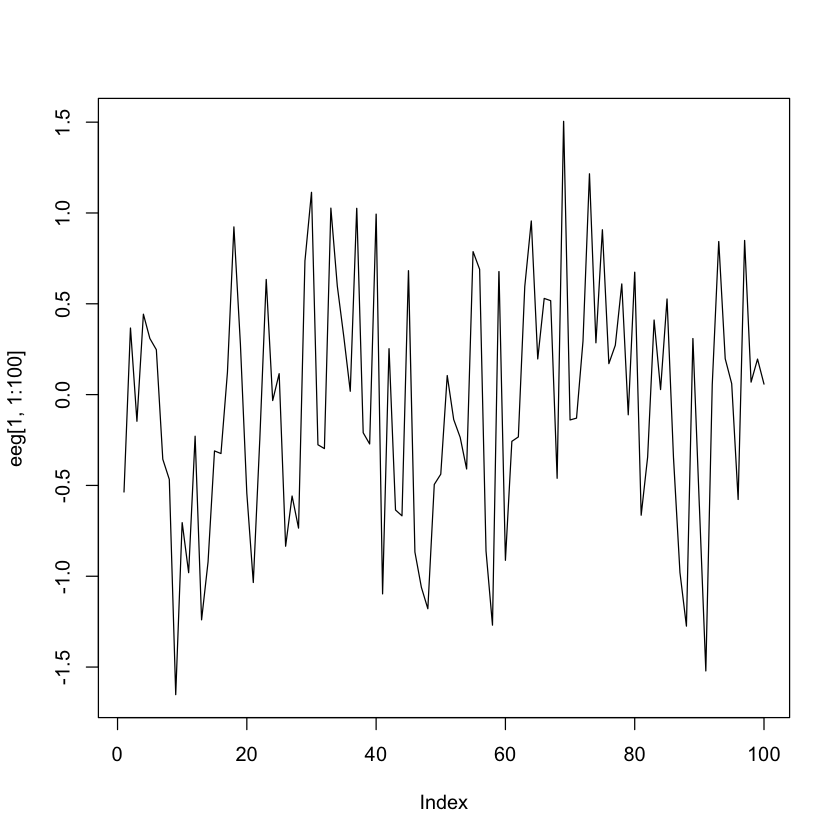

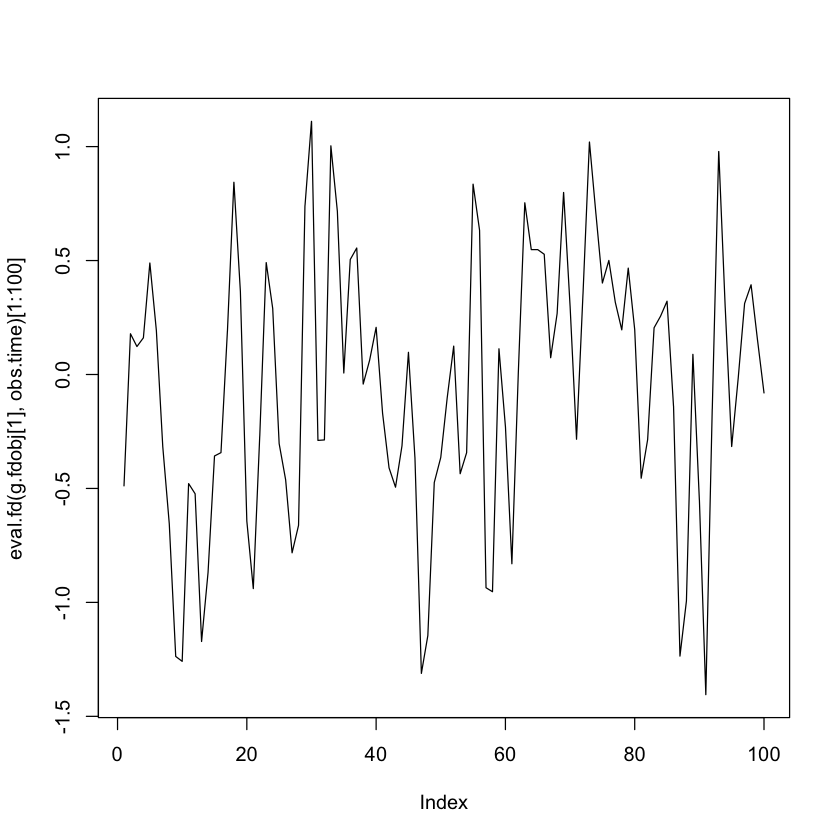

In [31]:
par(bg="white")
plot(eeg[1,1:100],type='l')
par(bg="white")
#plot([1:100])
plot(eval.fd(g.fdobj[1], obs.time)[1:100], type='l')

In [1]:
down_fc <- array(0, dim=c(26,68, 14900))
for(i in 1:14900){
    idx = ((i-1)*10+1):(i*10)
    sub_m <- aperm(f_t[,,idx], c(3,1,2))
    down_fc[,,i] <- colMeans(sub_m)

}
obs.time <- seq(3, 598, 595/(14900-1))
g = array(down_fc, dim = c(26*68,149500))
basis <- create.fourier.basis(rangeval=c(3, 598), nbasis=10)
obs.time <- seq(3, 598, 595/(149500-1))
g.fdobj<-Data2fd(argvals=obs.time, t(g))

ERROR: Error in aperm(f_t[, , idx], c(3, 1, 2)):  オブジェクト 'f_t' がありません 


In [49]:
dim(down_fc)
obs.time <- seq(3, 598, 595/(14900-1))


[1]    26    68 14900

In [50]:
#implement wavelet basis
g = array(down_fc, dim = c(26*68,dim(down_fc)[3]))

#obs.time <- obs.time[500:149500]
basis <- create.fourier.basis(rangeval=c(3, 598), nbasis=10)
g.fdobj<-Data2fd(argvals=obs.time, t(g))
par(bg="white")
plot.pca.fd(pca.fd(g.fdobj, nharm=5))

In [167]:
 <- obs.time[501:149500]

In [168]:
length(obs.time)

[1] 149001

In [159]:
for(i in range(1,10,1)){print(i)}

[1] 1
[1] 10
